In [1]:
import pandas as pd
import os

# Base directory where all the Tp{t}_mcesdf.csv files are stored
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/S63.SI'  # No {t} here

# Store results here
all_top_features = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        # Read the MCES result file
        df = pd.read_csv(file_path)

        # Add model name
        df['model'] = f't+{t}'

        # Get the feature with highest weighted score
        top_feature = df.sort_values(by='weighted_scores', ascending=False).iloc[0]

        all_top_features.append({
            'Model': f't+{t}',
            'Top Feature': top_feature['cols'],
            'Weighted Score': top_feature['weighted_scores']
        })

    except FileNotFoundError:
        print(f'File {file_path} not found, skipping...')

# Convert results to DataFrame
top_features_df = pd.DataFrame(all_top_features)

# Display or export
print(top_features_df)

# Optional: save to CSV
top_features_df.to_csv('top_mces_features_by_model.csv', index=False)


   Model     Top Feature  Weighted Score
0    t+1  x_Tm2_PriceChg        0.046127
1    t+2  x_Tm2_PriceChg        0.049855
2    t+3    x_Tm11_PRoc1        0.009299
3    t+4     x_Tm1_PRoc1        0.051157
4    t+5  x_Tm6_PriceChg        0.007288
5    t+6     x_Tm2_PRoc1        0.021391
6    t+7  x_Tm1_PriceChg        0.053822
7    t+8  x_Tm7_PriceChg        0.009830
8    t+9  x_Tm5_PriceChg        0.022127
9   t+10  x_Tm8_PriceChg        0.010371
10  t+11   x_Tm12_VolChg        0.027570
11  t+12     x_Tm5_PRoc1        0.025028
12  t+13  x_Tm2_PriceChg        0.027661


In [2]:
import pandas as pd
import os

# Directory containing MCES result files
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/S63.SI'

# List to hold top 13 features per model
top13_summary = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        df = pd.read_csv(file_path)
        df = df.sort_values(by='weighted_scores', ascending=False).head(13)

        row = {'Model': f't+{t}'}
        for i in range(13):
            row[f'Feature {i+1}'] = df.iloc[i]['cols']
            row[f'Feedback {i+1}'] = df.iloc[i]['weighted_scores']
        
        top13_summary.append(row)

    except Exception as e:
        print(f"Skipping t+{t} due to error: {e}")

# Create DataFrame
top13_df = pd.DataFrame(top13_summary)

# Clean feature names
def clean_feat(name):
    return name.replace('_', ' ').replace('Chg', '').replace('PRoc1', 'ROC').replace('Tm', 't-').replace('x', '')

for i in range(1, 14):
    top13_df[f'Feature {i}'] = top13_df[f'Feature {i}'].apply(clean_feat)

# Display or export
print(top13_df)
top13_df.to_csv('top13_mces_features_per_model.csv', index=False)


   Model   Feature 1  Feedback 1    Feature 2  Feedback 2    Feature 3  \
0    t+1   t-2 Price    0.046127     t-10 Vol    0.007547     t-12 Vol   
1    t+2   t-2 Price    0.049855    t-4 Price    0.030721    t-3 Price   
2    t+3    t-11 ROC    0.009299      t-3 ROC    0.006550      t-6 Vol   
3    t+4     t-1 ROC    0.051157    t-1 Price    0.033959      t-5 ROC   
4    t+5   t-6 Price    0.007288      t-5 Vol    0.004357      t-7 Vol   
5    t+6     t-2 ROC    0.021391      t-1 Vol    0.017152   t-10 Price   
6    t+7   t-1 Price    0.053822    t-5 Price    0.009559      t-1 Vol   
7    t+8   t-7 Price    0.009830      t-5 Vol    0.009593      t-1 Vol   
8    t+9   t-5 Price    0.022127   t-10 Price    0.018325     t-13 Vol   
9   t+10   t-8 Price    0.010371      t-5 Vol    0.003445      t-1 Vol   
10  t+11    t-12 Vol    0.027570    t-6 Price    0.024209      t-2 Vol   
11  t+12     t-5 ROC    0.025028    t-4 Price    0.019668      t-1 Vol   
12  t+13   t-2 Price    0.027661     t

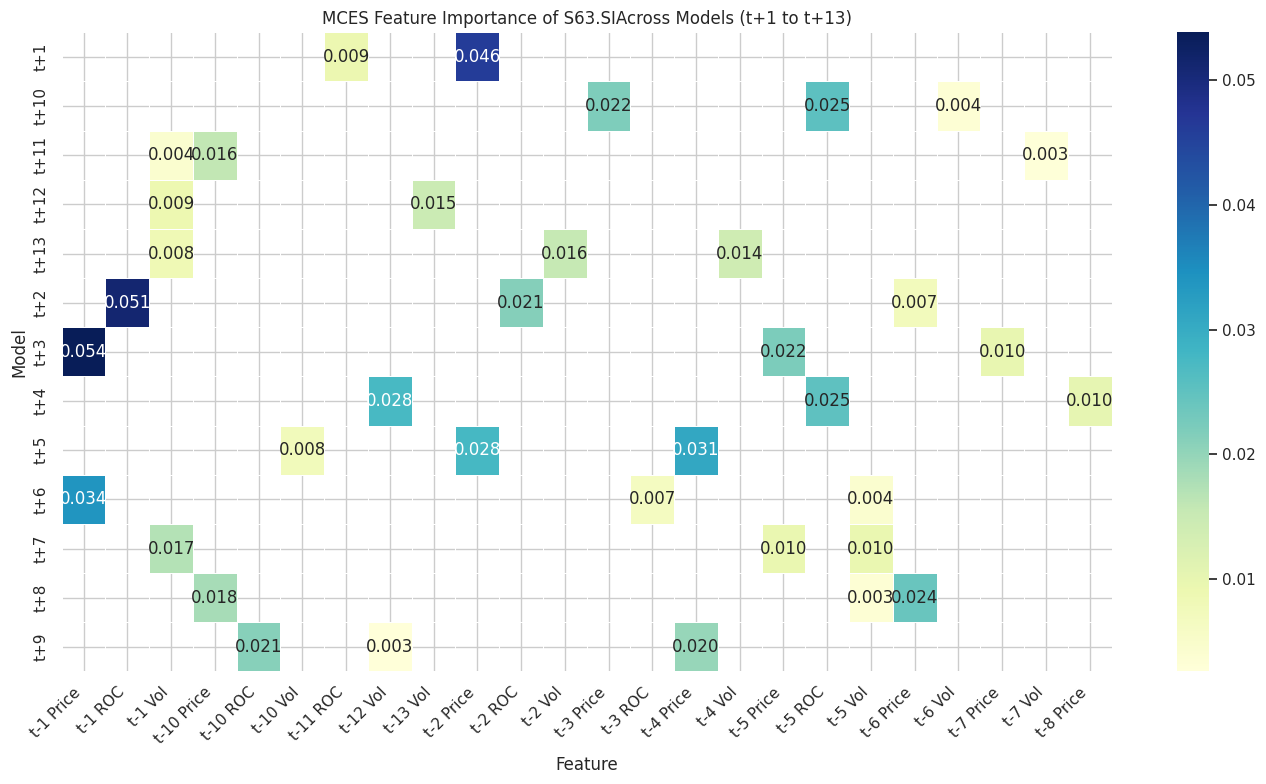

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the just-saved top3 summary CSV
top3_df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/S63.SI/top13_mces_features_per_model.csv")

# Convert wide format to long for visualization
long_df = pd.DataFrame({
    'Model': top3_df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([top3_df['Feature 1'], top3_df['Feature 2'], top3_df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([top3_df['Feedback 1'], top3_df['Feedback 2'], top3_df['Feedback 3']], ignore_index=True)
})

# Create a pivot table for heatmap (Models as rows, Features as columns)
pivot_df = long_df.pivot_table(index='Model', columns='Feature', values='Feedback', aggfunc='first')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".3f", linewidths=0.5)
plt.title("MCES Feature Importance of S63.SIAcross Models (t+1 to t+13)")
plt.ylabel("Model")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import os

# Directory containing the MCES result files
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/S63.SI'  # No {t} here

# List to hold each model's top 3 features and their scores
top3_summary = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        df = pd.read_csv(file_path)
        df = df.sort_values(by='weighted_scores', ascending=False).head(3)

        # Format raw feature names
        row = {
            'Model': f't+{t}',
            'Feature 1': df.iloc[0]['cols'],
            'Feedback 1': df.iloc[0]['weighted_scores'],
            'Feature 2': df.iloc[1]['cols'],
            'Feedback 2': df.iloc[1]['weighted_scores'],
            'Feature 3': df.iloc[2]['cols'],
            'Feedback 3': df.iloc[2]['weighted_scores'],
        }
        top3_summary.append(row)

    except Exception as e:
        print(f"[Warning] Skipping t+{t} due to error: {e}")

# Create summary DataFrame
top3_df = pd.DataFrame(top3_summary)

# Clean feature names for readability
def clean_feat(name):
    return name.replace('_', ' ')\
               .replace('Chg', '')\
               .replace('PRoc1', 'ROC')\
               .replace('Tm', 't-')\
               .replace('x', '')\
               .strip()

for i in range(1, 4):
    top3_df[f'Feature {i}'] = top3_df[f'Feature {i}'].apply(clean_feat)

# Display the cleaned summary
print(top3_df)

# Save to CSV
output_path = os.path.join(data_dir, 'top3_mces_features_per_model.csv')
top3_df.to_csv(output_path, index=False)
print(f"\n✅ Saved to {output_path}")


   Model  Feature 1  Feedback 1   Feature 2  Feedback 2   Feature 3  \
0    t+1  t-2 Price    0.046127    t-10 Vol    0.007547    t-12 Vol   
1    t+2  t-2 Price    0.049855   t-4 Price    0.030721   t-3 Price   
2    t+3   t-11 ROC    0.009299     t-3 ROC    0.006550     t-6 Vol   
3    t+4    t-1 ROC    0.051157   t-1 Price    0.033959     t-5 ROC   
4    t+5  t-6 Price    0.007288     t-5 Vol    0.004357     t-7 Vol   
5    t+6    t-2 ROC    0.021391     t-1 Vol    0.017152  t-10 Price   
6    t+7  t-1 Price    0.053822   t-5 Price    0.009559     t-1 Vol   
7    t+8  t-7 Price    0.009830     t-5 Vol    0.009593     t-1 Vol   
8    t+9  t-5 Price    0.022127  t-10 Price    0.018325    t-13 Vol   
9   t+10  t-8 Price    0.010371     t-5 Vol    0.003445     t-1 Vol   
10  t+11   t-12 Vol    0.027570   t-6 Price    0.024209     t-2 Vol   
11  t+12    t-5 ROC    0.025028   t-4 Price    0.019668     t-1 Vol   
12  t+13  t-2 Price    0.027661    t-10 ROC    0.021107     t-4 Vol   

    F

In [5]:
import pandas as pd

df = pd.read_csv('top3_mces_features_per_model.csv')
print(df.columns.tolist())
print(df.head())


['Model', 'Feature 1', 'Feedback 1', 'Feature 2', 'Feedback 2', 'Feature 3', 'Feedback 3']
  Model  Feature 1  Feedback 1  Feature 2  Feedback 2  Feature 3  Feedback 3
0   t+1  t-2 Price    0.046127   t-10 Vol    0.007547   t-12 Vol    0.002608
1   t+2  t-2 Price    0.049855  t-4 Price    0.030721  t-3 Price    0.021998
2   t+3   t-11 ROC    0.009299    t-3 ROC    0.006550    t-6 Vol    0.003541
3   t+4    t-1 ROC    0.051157  t-1 Price    0.033959    t-5 ROC    0.025318
4   t+5  t-6 Price    0.007288    t-5 Vol    0.004357    t-7 Vol    0.002975


In [6]:
import pandas as pd
from collections import Counter

# Load data
df = pd.read_csv("top3_mces_features_per_model.csv")

# Convert wide format to long format
long_df = pd.DataFrame({
    'Model': df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([df['Feature 1'], df['Feature 2'], df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([df['Feedback 1'], df['Feedback 2'], df['Feedback 3']], ignore_index=True)
})

# Count frequency of each feature
feature_counts = long_df['Feature'].value_counts().reset_index()
feature_counts.columns = ['Feature', 'Frequency']

# Calculate average feedback per feature
feature_avg_feedback = long_df.groupby('Feature')['Feedback'].mean().reset_index()
feature_avg_feedback.columns = ['Feature', 'Avg Feedback']

# Merge both metrics
feature_summary = pd.merge(feature_counts, feature_avg_feedback, on='Feature')

# Sort by frequency and feedback
feature_summary = feature_summary.sort_values(by=['Frequency', 'Avg Feedback'], ascending=[False, False]).reset_index(drop=True)

# Display results
print("Feature Summary (Frequency + Avg Feedback):")
print(feature_summary)

# Save to CSV
feature_summary.to_csv("feature_summary.csv", index=False)


Feature Summary (Frequency + Avg Feedback):
       Feature  Frequency  Avg Feedback
0      t-1 Vol          5      0.008428
1    t-2 Price          3      0.041215
2      t-5 Vol          3      0.005798
3    t-1 Price          2      0.043890
4    t-4 Price          2      0.025194
5      t-5 ROC          2      0.025173
6   t-10 Price          2      0.017116
7    t-5 Price          2      0.015843
8    t-6 Price          2      0.015748
9     t-12 Vol          2      0.015089
10     t-1 ROC          1      0.051157
11   t-3 Price          1      0.021998
12     t-2 ROC          1      0.021391
13    t-10 ROC          1      0.021107
14     t-2 Vol          1      0.015549
15    t-13 Vol          1      0.014632
16     t-4 Vol          1      0.014084
17   t-8 Price          1      0.010371
18   t-7 Price          1      0.009830
19    t-11 ROC          1      0.009299
20    t-10 Vol          1      0.007547
21     t-3 ROC          1      0.006550
22     t-6 Vol          1      0.003

/tmp/ipykernel_452528/865165482.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(
/tmp/ipykernel_452528/865165482.py:34: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  bar = sns.barplot(


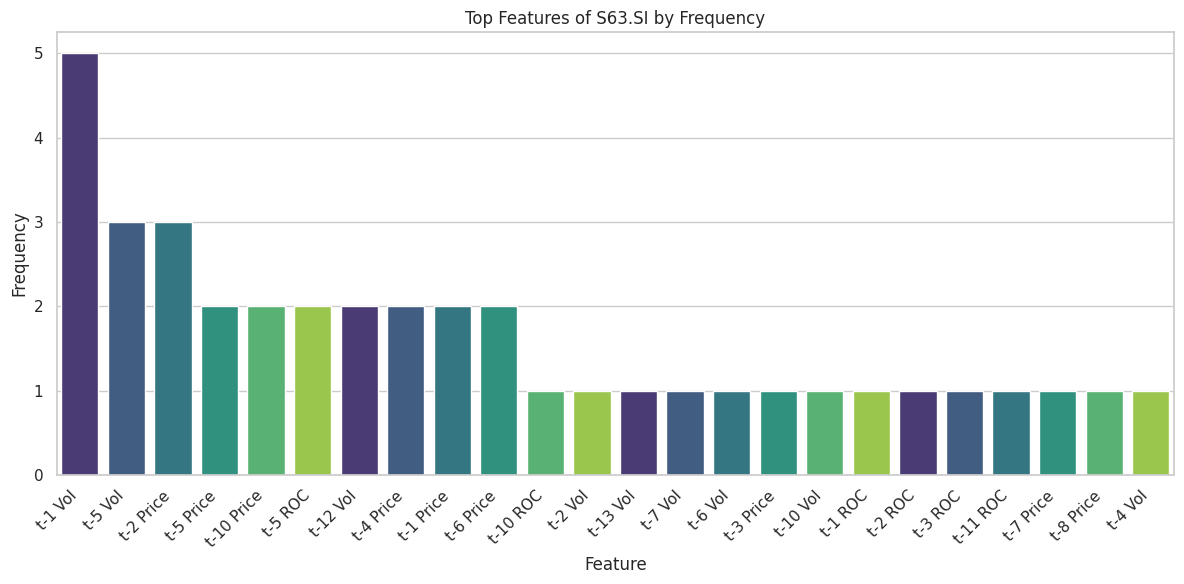

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV again
df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/S63.SI/top3_mces_features_per_model.csv")

# Reshape the wide format into long format
long_df = pd.DataFrame({
    'Model': df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([df['Feature 1'], df['Feature 2'], df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([df['Feedback 1'], df['Feedback 2'], df['Feedback 3']], ignore_index=True)
})

# Count frequency
feature_counts = long_df['Feature'].value_counts().reset_index()
feature_counts.columns = ['Feature', 'Frequency']

# Average feedback
feature_avg = long_df.groupby('Feature')['Feedback'].mean().reset_index()
feature_avg.columns = ['Feature', 'Avg Feedback']

# Merge both
summary_df = pd.merge(feature_counts, feature_avg, on='Feature')

# Sort for plotting
summary_df = summary_df.sort_values(by='Frequency', ascending=False)

# Set plot style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Barplot with color intensity based on feedback
bar = sns.barplot(
    data=summary_df,
    x='Feature',
    y='Frequency',
    palette=sns.color_palette("viridis", as_cmap=False)
)

plt.title('Top Features of S63.SI by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import os

tickers = ['S63.SI']  # Example tickers
base_data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data'

outcomes = {}
all_top_features = []

for ticker in tickers:
    ticker_df = pd.DataFrame()

    for t in range(1, 14):
        ticker_dir = os.path.join(base_data_dir, ticker, f'Tp{t}')  # Moved inside the loop
        file_name = f'Tp{t}_mcesdf.csv'
        file_path = os.path.join(ticker_dir, file_name)

        try:
            df = pd.read_csv(file_path)
            df = df.sort_values(by='weighted_scores', ascending=False)

            # Append top 6 features to the aggregated DataFrame
            top6_df = df[['cols']].head(6)
            ticker_df = pd.concat([ticker_df, top6_df], axis=0)

            # # Record the top 1 feature for this model
            # top_feature = df.iloc[0]
            # all_top_features.append({
            #     'Ticker': ticker,
            #     'Model': f't+{t}',
            #     'Top Feature': top_feature['cols'],
            #     'Weighted Score': top_feature['weighted_scores']
            # })
            # Record the top 3 features for this model
            top3_df = df[['cols', 'weighted_scores']].head(3)
            for i, row in top3_df.iterrows():
                all_top_features.append({
                    'Ticker': ticker,
                    'Model': f't+{t}',
                    'Rank': f'Top {i+1}',
                    'Feature': row['cols'],
                    'Weighted Score': row['weighted_scores']
                })


        except FileNotFoundError:
            print(f'File {file_path} not found, skipping...')

    # Process cumulative top features for the ticker
    ticker_df = ticker_df.groupby('cols').agg({'cols': 'count'})
    ticker_df = ticker_df.rename(columns={'cols': 'Count'})
    ticker_df = ticker_df.sort_values(by=['Count', 'cols'], ascending=[False, True])
    ticker_df = ticker_df.reset_index(drop=False)
    ticker_df = ticker_df.rename(columns={'cols': 'Feature'})

    # Clean feature names
# Final combined DataFrame of top features per model and ticker
top_features_df = pd.DataFrame(all_top_features)

# Clean feature names
top_features_df['Feature'] = top_features_df['Feature'].apply(
    lambda x: x.replace('_', ' ')
               .replace('Chg', '')
               .replace('PRoc1', 'ROC')
               .replace('Tm', 't-')
               .replace('x', '')
)

# Save to CSV if needed
top_features_df.to_csv('top_mces_features_by_model.csv', index=False)

# Display
print("Top 3 features per model:")
print(top_features_df)


Top 3 features per model:
    Ticker Model   Rank      Feature  Weighted Score
0   S63.SI   t+1  Top 1    t-2 Price        0.046127
1   S63.SI   t+1  Top 2     t-10 Vol        0.007547
2   S63.SI   t+1  Top 3     t-12 Vol        0.002608
3   S63.SI   t+2  Top 1    t-2 Price        0.049855
4   S63.SI   t+2  Top 2    t-4 Price        0.030721
5   S63.SI   t+2  Top 3    t-3 Price        0.021998
6   S63.SI   t+3  Top 1     t-11 ROC        0.009299
7   S63.SI   t+3  Top 2      t-3 ROC        0.006550
8   S63.SI   t+3  Top 3      t-6 Vol        0.003541
9   S63.SI   t+4  Top 1      t-1 ROC        0.051157
10  S63.SI   t+4  Top 2    t-1 Price        0.033959
11  S63.SI   t+4  Top 3      t-5 ROC        0.025318
12  S63.SI   t+5  Top 1    t-6 Price        0.007288
13  S63.SI   t+5  Top 2      t-5 Vol        0.004357
14  S63.SI   t+5  Top 3      t-7 Vol        0.002975
15  S63.SI   t+6  Top 1      t-2 ROC        0.021391
16  S63.SI   t+6  Top 2      t-1 Vol        0.017152
17  S63.SI   t+6  To